In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
data = pd.read_csv('real_estate_data.csv', '\t')

/Users/mak/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [301]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [302]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

# Ошибки

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Колонки: ceiling_height(9195), floors_total(83), living_area(1903), is_apartment(20924), kitchen_area(2278), balcony(11519), locality_name(49), airports_nearest(5542), cityCenters_nearest(5519), parks_around3000(5518), parks_nearest(15620), ponds_around3000(5518), ponds_nearest(14589), days_exposition(3181)

Наполнение колонки 'is_apartment', 'first_day_exposition', 'floors_total', 'balcony' и 'days_exposition' не соответствует типу данных
</div>

 <div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
 Я думаю, можно изменить датафрейм, удалив такие колонки как "airports_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest ", "total_images", поскольку они не повлияют значительно на анализ
</div>

In [304]:
data = data.drop(columns = ['total_images', 'airports_nearest', 
                            'parks_around3000', 'parks_nearest', 
                            'ponds_around3000', 'ponds_nearest' ], axis = 1)
data.columns

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'cityCenters_nearest', 'days_exposition'],
      dtype='object')

# Предобработка
# 'ceiling_height'

## Проверка колонки с потолками на адекватные значения и пропуски

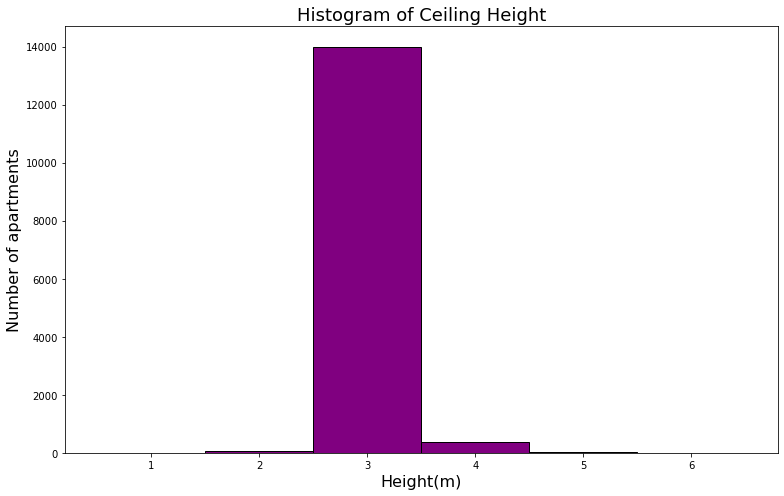

In [305]:
plt.figure(figsize = (11, 7))
plt.hist(data['ceiling_height'], 
         bins = [i+0.5 for i in range(7)],  # [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
         color = 'purple', 
         edgecolor = 'black')
plt.xlabel('Height(m)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Ceiling Height', size=18)
plt.tight_layout()
plt.show()

 <div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
На гистограмме заметно, что основная плотность сконцентрирована на высоте потолков в промежутке от 2.6м до 3.5м
</div>

 <div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Колонки со значениями потолков больше 5м заменяем на среднее значение, а значения с высотой 100м и 1м потолков 
(по гос. стандарту мин. высота достигает 2.4 м) удаляем, таких больших отклонений по 1му случаю
</div>

In [306]:
data['ceiling_height'].min(), data['ceiling_height'].max()

(1.0, 100.0)

In [307]:
ceiling_to_drop = data[(data['ceiling_height'] == 1.0) | (data['ceiling_height'] == 100.0)]
display(ceiling_to_drop)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
22590,6000000.0,55.0,2018-10-31T00:00:00,2,1.0,12.0,32.4,7,NaN,False,False,10.0,NaN,Санкт-Петербург,14217.0,13.0
22869,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,8283.0,19.0


In [308]:
data.drop(labels=list(ceiling_to_drop.index), 
          axis=0, 
          inplace=True)

In [309]:
del ceiling_to_drop

In [310]:
data[data['ceiling_height'] >= 5].shape

(36, 16)

In [311]:
data['ceiling_height'].mean()

2.7649165632326014

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Мы заменяем на среднее значения потолков, которые >= 5 м, потому что, во-первых, их немного и это не сильно повлияет на распределение, а, во-вторых, от 2.6 м начинается стандартная высота потолков для квартир (помещений), которая обычно встречается в городе, потолки выше 3 м чаще используются в строительстве частных загородных домов

In [312]:
def potolki(row):
    if row >= 5:
        return round(data['ceiling_height'].mean(), 1)
    else:
        return row

In [313]:
data['ceiling_height'] = data['ceiling_height'].apply(potolki)

In [314]:
data.loc[data.ceiling_height < 2.4, 'ceiling_height'] = 2.8

In [315]:
data[(data.ceiling_height < 2.4) | (data.ceiling_height >= 5)]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition


## Теперь заполняем пропуски средним значением по потолкам

In [316]:
data['ceiling_height'] =  data['ceiling_height'].fillna(data['ceiling_height'].mean())

In [317]:
data['ceiling_height'] =  data['ceiling_height'].round(2)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23697 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23697 non-null  float64
 1   total_area            23697 non-null  float64
 2   first_day_exposition  23697 non-null  object 
 3   rooms                 23697 non-null  int64  
 4   ceiling_height        23697 non-null  float64
 5   floors_total          23611 non-null  float64
 6   living_area           21794 non-null  float64
 7   floor                 23697 non-null  int64  
 8   is_apartment          2774 non-null   object 
 9   studio                23697 non-null  bool   
 10  open_plan             23697 non-null  bool   
 11  kitchen_area          21419 non-null  float64
 12  balcony               12179 non-null  float64
 13  locality_name         23648 non-null  object 
 14  cityCenters_nearest   18178 non-null  float64
 15  days_exposition    

# 'living_area'

## Проверка адекватных значений и пропусков жилой площади

In [318]:
data['living_area'].min(), data['living_area'].max()

(2.0, 409.7)

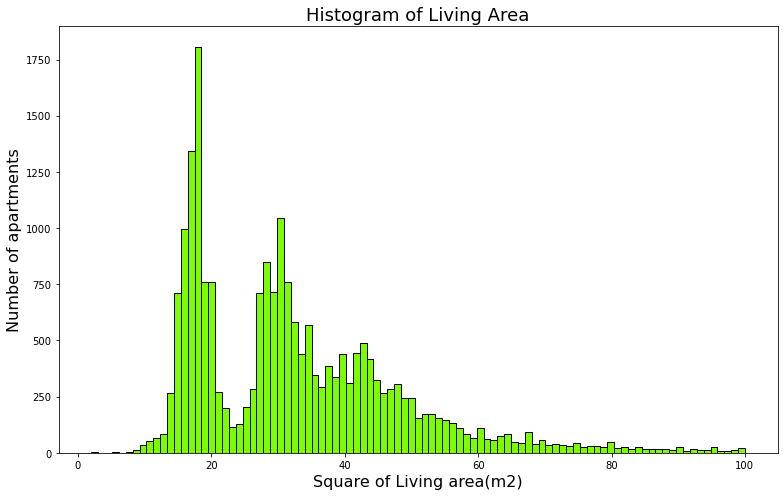

In [319]:
plt.figure(figsize = (11, 7))
# plt.hist(data['living_area'], bins = [2, 10, 20, 50, 100, 150, 200, 250, 300, 350, 400],
#                               color = 'LawnGreen', edgecolor = 'black')
plt.hist(data.loc[data.living_area <= 100, 'living_area'], bins = 95,
         color = 'LawnGreen', edgecolor = 'black') 
plt.xlabel('Square of Living area(m2)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Living Area', size=18)
plt.tight_layout()
plt.show()

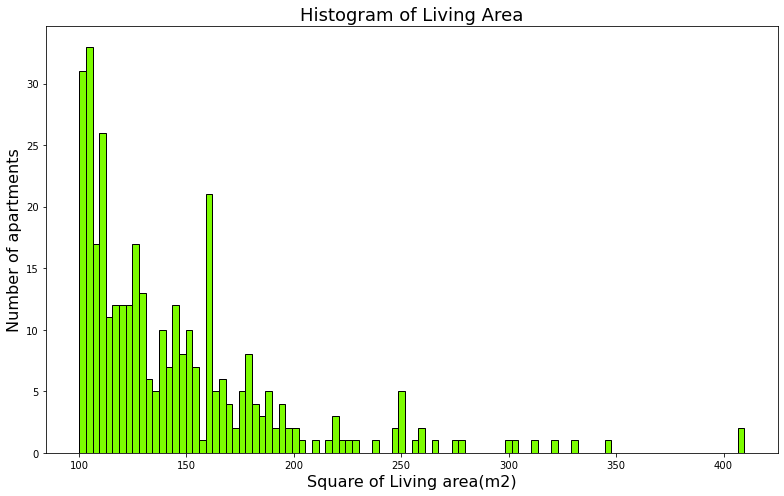

In [320]:
plt.figure(figsize = (11, 7))
plt.hist(data.loc[data.living_area > 100, 'living_area'], bins = 100,
         color = 'LawnGreen', edgecolor = 'black') 
plt.xlabel('Square of Living area(m2)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Living Area', size=18)
plt.tight_layout()
plt.show()

In [321]:
print('\nквартиры, в которых жилая площадь больше чем общая')
display(data[data['living_area'] >= data['total_area']])
print('\n\nквартиры, в которых жилая площадь меньше чем балконы')
display(data[data['living_area'] <= data['balcony']])


квартиры, в которых жилая площадь больше чем общая


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
9861,2350000.0,25.0,2017-12-03T00:00:00,0,2.73,22.0,25.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,13.0
12691,3700000.0,24.2,2017-11-10T00:00:00,0,2.73,19.0,24.2,13,NaN,False,True,NaN,1.0,Санкт-Петербург,16840.0,74.0




квартиры, в которых жилая площадь меньше чем балконы


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition


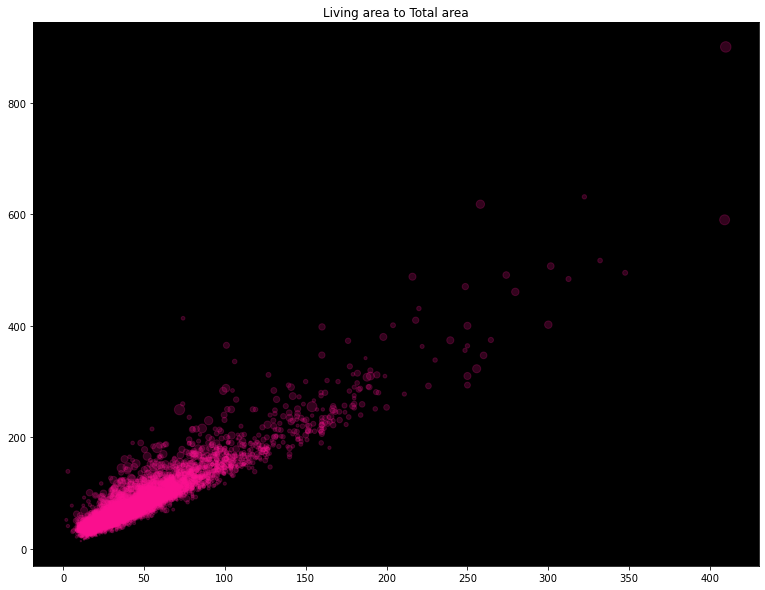

In [322]:
x = data['living_area']
y = data['total_area']
z = data['kitchen_area']
fig, ax = plt.subplots()

ax.scatter(x, y, z, c = 'deeppink', alpha=.2)    
ax.set_facecolor('black')     
ax.set_title('Living area to Total area')
fig.set_figwidth(13)     
fig.set_figheight(10)    
plt.show()

In [323]:
data[data['living_area'] <= 8].shape

(10, 16)

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
     ЖК РФ устанавливает минимальную норму жилой площади - 8 кв.м. Мы видим по графику, что значений площади жилой части меньше установленной нормы немного и, анализируя общую площадь и площадь кухонной зоны, мы можем заменить некоторые значения на среднее (если общая площадь больше 35м), а некоторые (у которых общая площадь меньше 35м и кухня не превышает метраж общей площади) на значения минимальной установленной нормы

In [324]:
data['living_area'].mean()

34.45888554244259

In [325]:
data.loc[(data.living_area < 8) & (data.total_area <= 35), 'living_area'] = 8
data.loc[(data.living_area < 8) & (data.total_area >= 35), 'living_area'] = data['living_area'].mean()
# смотрим на результат
display(data[data['living_area'] < 8])

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition


In [326]:
data[data['living_area'] == 409.7] # посмотрела адекватность значения с максимальной жилой площадью

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
19540,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,7877.0,106.0


## Теперь заменяем пропуски на среднее значение жилой площади 

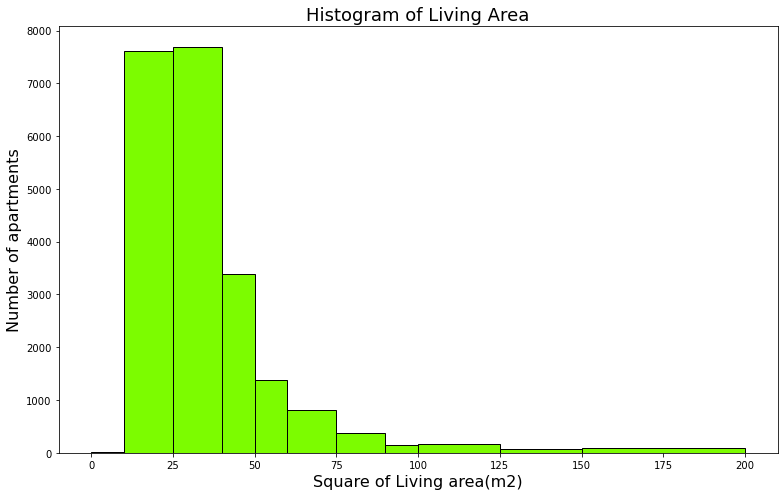

In [327]:
plt.figure(figsize = (11, 7))
plt.hist(data['living_area'], 
         bins = [0, 10, 25, 40, 50, 60, 75, 90, 100, 125, 150, 200], 
         color = 'LawnGreen', 
         edgecolor = 'black')
plt.xlabel('Square of Living area(m2)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Living Area', size=18)
plt.tight_layout()
plt.show()

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
По гистограмме видно, что больше всего продаётся квартир(помещений) с размером жилой площади от 10 до 40 м2. (примерно 40% от всех квартир). Я думаю, при замене пропусков в этом случае тоже следует опираться на общую площадь квартиры (помещения), если она больше среднего значения 35 м2, то жилую площадь можно заменить средним, если нет, то стоит опираться уже на другие параметры (площадь кухни, например)

In [328]:
data.loc[(data.living_area.isnull()) & (data.total_area > 35), 'living_area'] = data['living_area'].mean()

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23697 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23697 non-null  float64
 1   total_area            23697 non-null  float64
 2   first_day_exposition  23697 non-null  object 
 3   rooms                 23697 non-null  int64  
 4   ceiling_height        23697 non-null  float64
 5   floors_total          23611 non-null  float64
 6   living_area           23432 non-null  float64
 7   floor                 23697 non-null  int64  
 8   is_apartment          2774 non-null   object 
 9   studio                23697 non-null  bool   
 10  open_plan             23697 non-null  bool   
 11  kitchen_area          21419 non-null  float64
 12  balcony               12179 non-null  float64
 13  locality_name         23648 non-null  object 
 14  cityCenters_nearest   18178 non-null  float64
 15  days_exposition    

In [330]:
data_living_area_anal = data[data['living_area'].isnull()]

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Cоздала датаcет, чтобы проанализировать срез с общей площадью и кухонной зоной

In [331]:
(data_living_area_anal
 .loc[:, 'total_area':'kitchen_area']
 .sort_values(by='kitchen_area', 
              ascending=False)
 .head(20))

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area
11981,33.95,2018-06-19T00:00:00,2,2.73,18.0,NaN,12,NaN,False,False,14.97
13214,32.30,2017-05-11T00:00:00,1,2.73,3.0,NaN,2,NaN,False,False,11.30
19893,33.02,2018-06-02T00:00:00,1,2.55,25.0,NaN,10,NaN,False,False,11.14
1832,32.84,2018-03-28T00:00:00,1,2.73,24.0,NaN,2,NaN,False,False,11.05
2386,34.12,2018-07-29T00:00:00,1,2.80,8.0,NaN,1,NaN,False,False,10.51
21993,31.48,2019-03-24T00:00:00,1,2.75,25.0,NaN,5,NaN,False,False,10.00
9745,33.65,2017-09-28T00:00:00,1,2.75,23.0,NaN,19,NaN,False,False,9.80
6786,34.40,2018-02-16T00:00:00,1,2.70,13.0,NaN,2,NaN,False,False,9.50
5049,34.24,2018-06-20T00:00:00,1,2.75,16.0,NaN,5,NaN,False,False,9.38
4102,34.78,2019-01-30T00:00:00,1,2.73,4.0,NaN,4,NaN,False,False,9.32


<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
 Замечаем некоторую закономерность в кухонной площади, она в основном не больше 7 м2 и чаще всего встречается значение 10 м2. Теперь можно проанализировать метраж жилой части квартиры(помещения) с общей площадью до 35 м2 и кухонной площадью от 7 до 10 м2

In [332]:
data_for_mean = data.loc[(data.total_area < 35) & 
                         (data.kitchen_area <= 10) & 
                         (data.kitchen_area >= 7)]

In [333]:
data_for_mean['living_area'].mean()

16.240367521367528

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Я создала датасет на основе отфильтрованных данных, чтобы понять среднее жилой площади для квартир с указанными сверху параметрами и сделала вывод, что оставшиеся пропуски в основном датасете в колонке с жилой площадью можно заменить этим средним(16.3 м2)

In [334]:
data.loc[(data.living_area.isnull()) & 
         (data.total_area <= 35), 
         'living_area'] = 16.3

In [335]:
data[data['living_area'].isna()]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition


In [336]:
data['living_area'] =  data['living_area'].round(1)

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23697 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23697 non-null  float64
 1   total_area            23697 non-null  float64
 2   first_day_exposition  23697 non-null  object 
 3   rooms                 23697 non-null  int64  
 4   ceiling_height        23697 non-null  float64
 5   floors_total          23611 non-null  float64
 6   living_area           23697 non-null  float64
 7   floor                 23697 non-null  int64  
 8   is_apartment          2774 non-null   object 
 9   studio                23697 non-null  bool   
 10  open_plan             23697 non-null  bool   
 11  kitchen_area          21419 non-null  float64
 12  balcony               12179 non-null  float64
 13  locality_name         23648 non-null  object 
 14  cityCenters_nearest   18178 non-null  float64
 15  days_exposition    

# 'floors_total'

## Проверка на адекватность колонки с общим количеством этажей

In [338]:
data['floors_total'].max(), data['floors_total'].min()

(60.0, 1.0)

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Проверила есть ли в городе-порту Кронштадт небоксребы, скорее всего речь идет о единственном небоскребе Лахта Центр, и, скорее всего, продается офис или помещение, решила оставить



In [339]:
data[data['floors_total'] == 60.0]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
2253,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,49488.0,166.0


<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Проверила логичность существования одноэтажных построек в Санкт-Петербурге (здесь они в основном только в небольших городах и пгт)


In [340]:
data[data['floors_total'] == 1].head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
3076,2000000.0,80.0,2018-01-03T00:00:00,3,2.73,1.0,48.5,1,NaN,False,False,10.0,NaN,Волосово,NaN,44.0
4379,5300000.0,58.5,2017-11-15T00:00:00,2,2.73,1.0,31.6,1,NaN,False,False,9.4,NaN,поселок городского типа Рощино,NaN,226.0
5300,2990000.0,60.0,2018-11-15T00:00:00,3,2.73,1.0,50.0,1,NaN,False,False,10.0,NaN,поселок станции Вещево,NaN,40.0
5698,450000.0,42.0,2017-07-31T00:00:00,2,2.73,1.0,23.0,1,NaN,False,False,5.8,NaN,городской посёлок Будогощь,NaN,233.0
5787,9000000.0,88.0,2018-08-06T00:00:00,3,2.73,1.0,34.5,1,NaN,False,False,NaN,NaN,Санкт-Петербург,20802.0,60.0
7962,550000.0,46.2,2018-04-20T00:00:00,3,2.73,1.0,34.5,1,NaN,False,False,NaN,NaN,Луга,NaN,45.0
8335,2700000.0,80.0,2018-07-07T00:00:00,3,3.00,1.0,45.0,1,NaN,False,False,15.0,NaN,Луга,NaN,51.0
8388,3550000.0,48.2,2019-03-30T00:00:00,3,2.65,1.0,33.9,1,NaN,False,False,9.1,NaN,Сестрорецк,31144.0,NaN
9517,1200000.0,39.4,2018-01-08T00:00:00,2,2.73,1.0,34.5,1,NaN,False,False,NaN,NaN,посёлок Гаврилово,NaN,45.0
9752,850000.0,62.0,2018-11-10T00:00:00,2,2.73,1.0,31.0,1,NaN,False,False,11.0,NaN,деревня Сижно,NaN,NaN


In [341]:
data[data['floors_total'] < data['floor']]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition


## Теперь заменяем пропуски в общем количестве этажей 

In [342]:
data[data['floors_total'].isnull()]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
186,11640000.0,65.2,2018-10-02T00:00:00,2,2.73,NaN,30.8,4,NaN,False,False,12.00,NaN,Санкт-Петербург,12373.0,49.0
237,2438033.0,28.1,2016-11-23T00:00:00,1,2.73,NaN,20.8,1,NaN,False,False,NaN,0.0,Санкт-Петербург,17369.0,251.0
457,9788348.0,70.8,2015-08-01T00:00:00,2,2.73,NaN,38.4,12,NaN,False,False,10.63,0.0,Санкт-Петербург,8322.0,727.0
671,6051191.0,93.6,2017-04-06T00:00:00,3,2.73,NaN,47.1,8,NaN,False,False,16.80,0.0,Санкт-Петербург,17369.0,123.0
1757,3600000.0,39.0,2017-04-22T00:00:00,1,2.73,NaN,34.5,9,NaN,False,False,NaN,0.0,Санкт-Петербург,11618.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,34.5,3,NaN,False,False,NaN,NaN,Санкт-Петербург,15363.0,512.0
22656,4574160.0,64.5,2017-04-02T00:00:00,2,2.73,NaN,31.7,20,NaN,False,False,14.40,0.0,Санкт-Петербург,17369.0,127.0
22808,14569263.0,110.4,2016-11-20T00:00:00,3,2.73,NaN,45.4,6,NaN,False,False,23.42,0.0,Санкт-Петербург,4529.0,260.0
23590,21187872.0,123.3,2017-04-25T00:00:00,3,2.73,NaN,50.4,18,NaN,False,False,23.60,0.0,Санкт-Петербург,4529.0,104.0


<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
 Всего пропусков по общему кол-ву этажей - 86, думаю, в этом случае можно заменить тем же значением, что и в колонке 'floor', чтобы не было несостыковок


In [343]:
data.loc[(data.floors_total.isnull()), 'floors_total'] = data.floor.isna()

In [344]:
data['floors_total'] = data['floors_total'].astype(int)

In [345]:
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15,  0, 20, 28, 36, 21, 35, 34, 60,  1, 29,
       33, 52, 37])

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Проверяю нет ли отрицательных значений и нормальное ли максимальное значение этажа, на котором находится квартира (помещение)

In [346]:
data[data['floors_total'] > 35]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
397,5990000.0,54.0,2018-03-22T00:00:00,2,2.73,36,21.4,28,NaN,False,False,18.70,1.0,Санкт-Петербург,20444.0,11.0
2253,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60,27.4,4,NaN,False,False,7.40,NaN,Кронштадт,49488.0,166.0
5807,8150000.0,80.0,2019-01-09T00:00:00,2,2.80,36,41.0,13,NaN,False,False,12.00,5.0,Санкт-Петербург,20444.0,38.0
11079,9200000.0,75.0,2019-02-22T00:00:00,2,2.70,36,40.0,29,NaN,False,False,12.00,2.0,Санкт-Петербург,20444.0,NaN
16731,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52,10.5,18,NaN,False,False,14.00,NaN,Санкт-Петербург,12978.0,45.0
16934,4100000.0,40.0,2017-10-17T00:00:00,1,2.80,37,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,20444.0,71.0


In [347]:
data['floors_total'].max()

60

# 'is_apartment'

##  Проверка на адекватность и пропуски колонки

In [348]:
data[data['is_apartment'] == False].head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
11,3300000.0,44.0,2018-08-27T00:00:00,2,2.73,5,31.0,4,False,False,False,6.0,1.0,Ломоносов,51677.0,7.0
25,6800000.0,76.0,2015-10-01T00:00:00,2,2.75,23,39.0,18,False,False,False,15.0,2.0,Санкт-Петербург,14640.0,300.0
29,8600000.0,100.0,2016-04-09T00:00:00,3,2.73,19,52.0,15,False,False,False,11.0,0.0,Санкт-Петербург,11526.0,125.0
36,3790000.0,45.0,2017-01-25T00:00:00,2,2.73,9,27.0,9,False,False,False,6.3,2.0,Санкт-Петербург,16461.0,139.0
41,7900000.0,74.0,2016-05-04T00:00:00,3,2.73,14,59.0,8,False,False,False,12.0,5.0,Санкт-Петербург,12612.0,179.0


In [349]:
data[data['is_apartment'] == True].head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
543,12790000.0,56.6,2018-11-06T00:00:00,2,3.50,3,29.4,1,True,False,False,NaN,NaN,Петергоф,30437.0,NaN
916,8183000.0,70.0,2018-01-11T00:00:00,2,3.12,3,40.0,3,True,False,False,NaN,2.0,Санкт-Петербург,21729.0,179.0
1109,34878556.0,95.8,2014-12-09T00:00:00,2,2.73,6,58.3,5,True,False,False,20.0,1.0,Санкт-Петербург,318.0,1572.0
1608,2150000.0,20.1,2019-01-30T00:00:00,1,2.73,9,16.3,1,True,False,False,NaN,NaN,Санкт-Петербург,12147.0,13.0
2759,7500000.0,152.0,2018-07-27T00:00:00,3,3.00,3,34.5,1,True,False,False,NaN,1.0,Всеволожск,NaN,7.0


In [350]:
data['is_apartment'] =  data['is_apartment'].fillna(False)

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Так как колонка "is_apartment" имеет всего 2775  известных значений, пропуски можно заменить на False

In [351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23697 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23697 non-null  float64
 1   total_area            23697 non-null  float64
 2   first_day_exposition  23697 non-null  object 
 3   rooms                 23697 non-null  int64  
 4   ceiling_height        23697 non-null  float64
 5   floors_total          23697 non-null  int64  
 6   living_area           23697 non-null  float64
 7   floor                 23697 non-null  int64  
 8   is_apartment          23697 non-null  bool   
 9   studio                23697 non-null  bool   
 10  open_plan             23697 non-null  bool   
 11  kitchen_area          21419 non-null  float64
 12  balcony               12179 non-null  float64
 13  locality_name         23648 non-null  object 
 14  cityCenters_nearest   18178 non-null  float64
 15  days_exposition    

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Проанализируем столбец Studio. Студия - это 1 комната (или объеденённые несколько) и отдельно нежилая площадь (кухня, балкон и тд.) ==> комнат должно быть не больше 1

In [352]:
data.query('rooms > 1 and studio == True')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition


In [353]:
data.loc[:, 'rooms':'open_plan'].head(15)

,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan
0,3,2.70,16,51.0,8,False,False,False
1,1,2.73,11,18.6,1,False,False,False
2,2,2.73,5,34.3,4,False,False,False
3,3,2.73,14,34.5,9,False,False,False
4,2,3.03,14,32.0,13,False,False,False
5,1,2.73,12,14.4,5,False,False,False
6,1,2.73,26,10.6,6,False,False,False
7,2,2.73,24,34.5,22,False,False,False
8,1,2.73,27,15.4,26,False,False,False
9,3,2.50,9,43.6,7,False,False,False


# 'kitchen_area'

## Проверка на адекватность и пропуски столбца с площадью кухонной (обеденной) зоной

In [354]:
data['kitchen_area'].max(), data['kitchen_area'].min()

(112.0, 1.3)

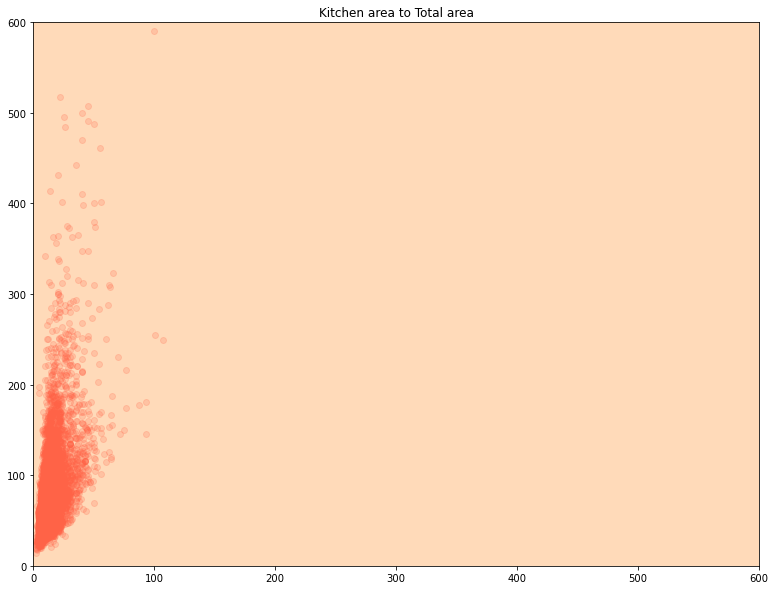

In [355]:
x = data['kitchen_area']
y = data['total_area']
fig, ax = plt.subplots()

ax.scatter(x, y, c = 'Tomato', alpha=0.2)
ax.set_ylim(0, 600)
ax.set_xlim(0, 600)
ax.set_facecolor('PeachPuff')     
ax.set_title('Kitchen area to Total area')
fig.set_figwidth(13)     
fig.set_figheight(10)    
plt.show()

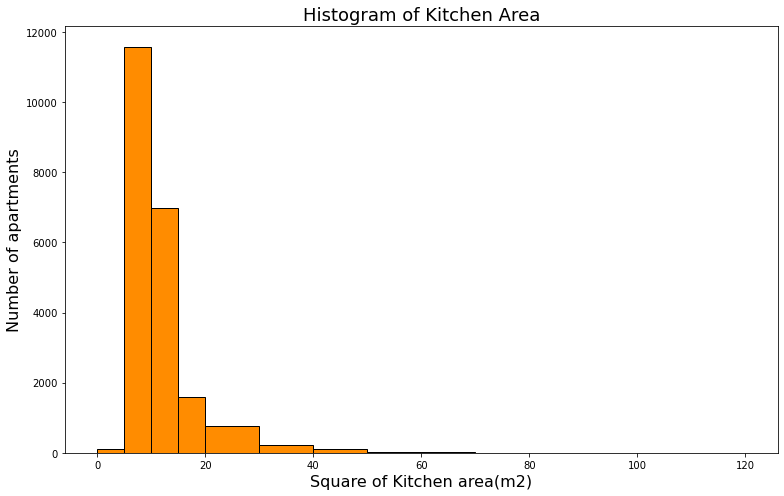

In [356]:
plt.figure(figsize = (11, 7))
plt.hist(data['kitchen_area'], 
         bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 90, 100, 120], 
         color = 'DarkOrange', 
         edgecolor = 'black')
plt.xlabel('Square of Kitchen area(m2)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Kitchen Area', size=18)
plt.tight_layout()
plt.show()

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Гистограмма показывает нам, что продаётся больше всего квартир с площадью кухонной зоны от 5 до 10 м2 (49% от всех квартир) и от 10 до 15 м2 (30%)

In [357]:
data[data['kitchen_area'] < 3]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
906,2600000.0,27.00,2017-07-10T00:00:00,1,2.75,23,18.0,18,False,False,False,2.00,0.0,Санкт-Петербург,17459.0,10.0
6262,3100000.0,24.00,2018-06-25T00:00:00,2,3.00,5,16.0,5,False,False,False,2.00,NaN,Санкт-Петербург,4914.0,54.0
7950,5967734.0,66.40,2017-02-07T00:00:00,2,2.73,4,44.4,2,False,False,False,2.89,NaN,Санкт-Петербург,20802.0,335.0
8729,2200000.0,18.40,2018-08-20T00:00:00,1,2.52,3,14.0,3,False,False,False,2.40,NaN,Пушкин,30687.0,59.0
9138,2920000.0,23.29,2018-12-12T00:00:00,1,2.73,3,21.0,1,False,False,False,2.00,NaN,Санкт-Петербург,4008.0,107.0
11033,5350000.0,32.00,2016-04-20T00:00:00,1,2.73,14,16.0,10,False,False,False,2.00,0.0,Санкт-Петербург,3953.0,210.0
16367,2720000.0,25.70,2017-10-30T00:00:00,1,2.73,19,22.6,11,False,False,False,2.00,NaN,Санкт-Петербург,13268.0,109.0
17834,2940000.0,34.70,2017-10-09T00:00:00,1,2.73,26,15.5,14,False,False,False,2.30,1.0,посёлок Мурино,NaN,318.0
19642,1190000.0,14.00,2018-07-29T00:00:00,1,2.73,5,11.0,1,False,False,False,2.00,NaN,Санкт-Петербург,11122.0,4.0
20217,4250000.0,28.50,2019-05-01T00:00:00,1,2.80,14,19.5,10,False,False,False,1.30,NaN,Санкт-Петербург,12721.0,NaN


<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Значение кухонной зоны 1.3 м2 я бы всё-таки заменила на 2 м2, поскольку это единственное такое отклонение и общий метраж (28.50 м2) позволяет это сделать и в сравнении также с другими еще меньшими общими метражами, где кухонная зона около 2.5 м2

In [358]:
data.loc[data.kitchen_area < 2, 'kitchen_area'] = 2.0

In [359]:
data['kitchen_area'].max()

112.0

In [360]:
display(data[data['kitchen_area'] == 112.0])
display(data[data['kitchen_area'] > data['total_area']])

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
19540,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25,409.7,25,False,False,False,112.0,NaN,Санкт-Петербург,7877.0,106.0


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition


## Теперь заменяем пропуски

In [361]:
data[data['kitchen_area'].isnull()].shape

(2278, 16)

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Также здесь нужно ориентироваться на общую и на жилую площади и заменять значения площади кухонной зоны на те, которые бы их не превышали 

In [362]:
data_for_kitchen = data.loc[(data.kitchen_area.isnull()) & (data.total_area <= 35)]

# создаю датафрейм с условиями где нет значений по кухне и общей площадью меньше 35 м2

In [363]:
data.loc[(data.kitchen_area.isnull()) & (data.total_area <= 35), 'kitchen_area'] = data['living_area'] - 5

# плюсом по умолчанию учтем метраж балкона (max = 5 м)

In [364]:
data_for_kitchen2 = data.loc[(data.kitchen_area.isnull()) & (data.total_area >= 35)]

# создаю датафрейм с условиями где нет значений по кухне и общей площадью больше 35 м2

In [365]:
data.loc[(data.kitchen_area.isnull()) & (data.total_area >= 35), 'kitchen_area'] = data['living_area'] - 5

# также учтем метраж балкона (max = 5 м)

In [366]:
data[data['kitchen_area'].isnull()]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition


In [367]:
data['kitchen_area'] = data['kitchen_area'].round(1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23697 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23697 non-null  float64
 1   total_area            23697 non-null  float64
 2   first_day_exposition  23697 non-null  object 
 3   rooms                 23697 non-null  int64  
 4   ceiling_height        23697 non-null  float64
 5   floors_total          23697 non-null  int64  
 6   living_area           23697 non-null  float64
 7   floor                 23697 non-null  int64  
 8   is_apartment          23697 non-null  bool   
 9   studio                23697 non-null  bool   
 10  open_plan             23697 non-null  bool   
 11  kitchen_area          23697 non-null  float64
 12  balcony               12179 non-null  float64
 13  locality_name         23648 non-null  object 
 14  cityCenters_nearest   18178 non-null  float64
 15  days_exposition    

In [368]:
del data_for_kitchen, data_for_kitchen2

# 'balcony'

## Проверка на адекватность и пропуски колонки с площадью балкона

In [369]:
print(f'Уникальные балконы: {data["balcony"].unique()}')
print(f'Среднее по балконам: {data["balcony"].mean()}')

Уникальные балконы: [nan  2.  0.  1.  5.  4.  3.]
Среднее по балконам: 1.1497659906396256


In [370]:
data[data['balcony'] == 0].shape  # следовательно в квартире (помещении) нет балкона

(3758, 16)

In [371]:
data[data['balcony'] > data['living_area']]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition


<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace">  
Теперь заменяем пропуски (которые по логике означают отсутствие балкона) на 0е значение

In [372]:
data['balcony'] =  data['balcony'].fillna(0.0)
data['balcony'] = data['balcony'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23697 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23697 non-null  float64
 1   total_area            23697 non-null  float64
 2   first_day_exposition  23697 non-null  object 
 3   rooms                 23697 non-null  int64  
 4   ceiling_height        23697 non-null  float64
 5   floors_total          23697 non-null  int64  
 6   living_area           23697 non-null  float64
 7   floor                 23697 non-null  int64  
 8   is_apartment          23697 non-null  bool   
 9   studio                23697 non-null  bool   
 10  open_plan             23697 non-null  bool   
 11  kitchen_area          23697 non-null  float64
 12  balcony               23697 non-null  int64  
 13  locality_name         23648 non-null  object 
 14  cityCenters_nearest   18178 non-null  float64
 15  days_exposition    

## Проверка колонки locality_name 

In [373]:
data[data['locality_name'].isnull()].shape

(49, 16)

<AxesSubplot:>

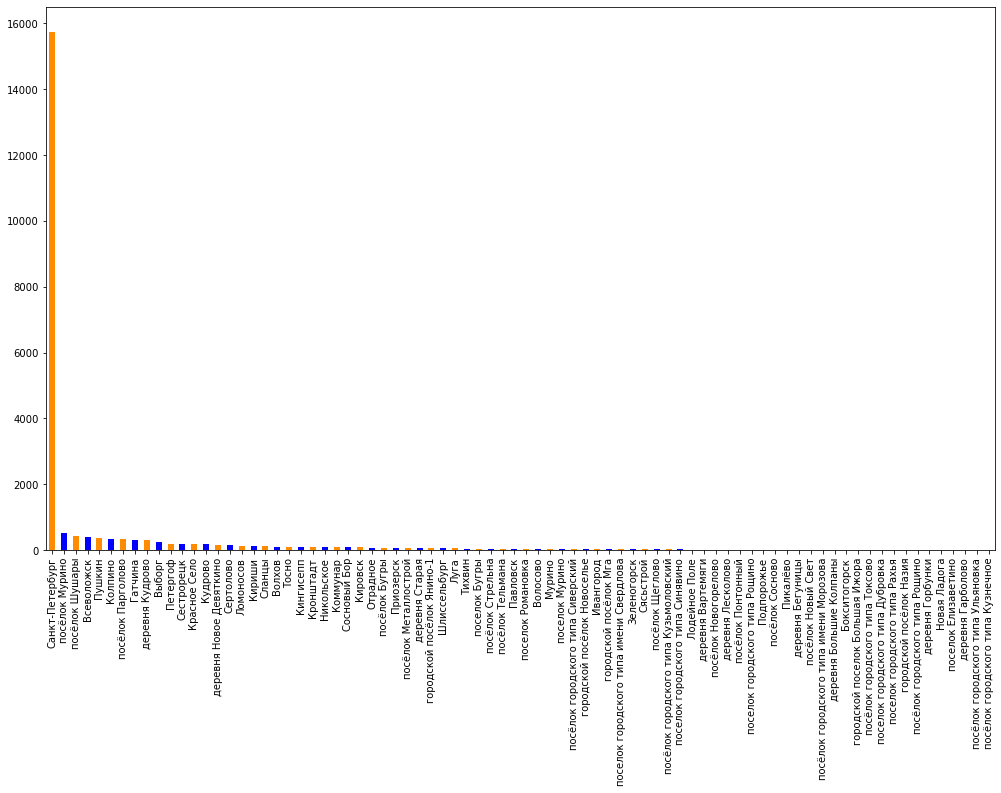

In [374]:
cities = data['locality_name'].value_counts().head(80)
color_bar = 'DarkOrange', 'Blue'

cities.plot.bar(figsize=(17, 10), color=color_bar)

In [375]:
data.loc[(data.locality_name == 'посёлок Шушары')].head(50) 

# проверяю удалённость от центра 3го (по встречающимся объявлениям) посёлка, по Мурино, в основном, пропуски

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
1,3350000.0,40.40,2018-12-04T00:00:00,1,2.73,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,18603.0,81.0
57,3200000.0,45.00,2017-10-25T00:00:00,1,2.73,25,17.0,10,False,False,False,12.0,0,посёлок Шушары,18883.0,173.0
82,4500000.0,80.50,2018-01-15T00:00:00,3,2.73,25,34.5,16,False,False,False,29.5,0,посёлок Шушары,18217.0,60.0
160,3300000.0,41.90,2017-07-30T00:00:00,1,2.73,7,15.4,7,False,False,False,12.4,2,посёлок Шушары,30245.0,228.0
171,3800000.0,49.00,2019-02-22T00:00:00,2,2.50,9,38.0,8,False,False,False,10.0,1,посёлок Шушары,24272.0,11.0
210,4300000.0,58.50,2016-06-15T00:00:00,2,2.73,9,28.7,7,False,False,False,11.2,1,посёлок Шушары,30317.0,45.0
272,3950000.0,52.03,2018-09-21T00:00:00,2,2.73,18,25.4,18,False,False,False,11.5,0,посёлок Шушары,17763.0,93.0
275,2000000.0,31.00,2015-06-24T00:00:00,1,2.75,9,15.0,9,False,False,False,10.0,2,посёлок Шушары,24272.0,443.0
338,3990000.0,40.00,2018-09-03T00:00:00,1,2.60,19,18.0,15,False,False,False,11.3,1,посёлок Шушары,17411.0,81.0
367,3450000.0,40.00,2017-10-17T00:00:00,1,2.60,5,17.7,5,False,False,False,11.2,0,посёлок Шушары,31151.0,508.0


In [376]:
data.loc[(data.locality_name == 'Всеволожск')].head(10) 

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
112,2500000.0,33.3,2018-03-27T00:00:00,1,2.55,9,19.0,3,False,False,False,7.0,2,Всеволожск,NaN,226.0
198,2900000.0,35.0,2015-02-04T00:00:00,1,2.70,17,16.1,17,False,False,False,8.3,2,Всеволожск,NaN,586.0
215,3700000.0,67.0,2018-09-07T00:00:00,3,2.70,9,42.2,8,False,False,False,5.5,0,Всеволожск,NaN,NaN
224,5650000.0,61.4,2016-03-09T00:00:00,2,2.73,16,34.0,8,False,False,False,14.0,0,Всеволожск,NaN,361.0
225,3350000.0,58.9,2017-04-05T00:00:00,2,2.60,5,31.5,3,False,False,False,12.9,1,Всеволожск,NaN,113.0
228,2530000.0,46.0,2017-11-25T00:00:00,1,2.77,4,19.3,3,False,False,False,11.0,0,Всеволожск,NaN,42.0
250,3200000.0,51.7,2019-01-22T00:00:00,2,2.65,16,29.2,5,False,False,False,7.7,4,Всеволожск,NaN,21.0
257,3450000.0,58.0,2016-03-14T00:00:00,3,2.73,9,38.5,1,False,False,False,6.1,2,Всеволожск,NaN,473.0
493,2950000.0,35.0,2018-06-21T00:00:00,1,2.75,9,15.0,8,False,False,False,10.0,1,Всеволожск,NaN,36.0
561,3400000.0,45.7,2018-08-07T00:00:00,1,2.80,9,19.7,1,False,False,False,16.1,0,Всеволожск,NaN,195.0


In [377]:
data_for_locality = data.loc[(data.locality_name.isnull())]

In [378]:
data_for_locality['cityCenters_nearest']

1097      4258.0
2033         NaN
2603     17369.0
2632     17369.0
3574      8127.0
4151      3902.0
4189      3039.0
4670      5382.0
5343      9538.0
5707     16788.0
6765     17369.0
7114      8582.0
7330      4627.0
7600     12332.0
8568      4065.0
8986     31813.0
9821      3801.0
10122     4474.0
11248     4069.0
12879    12332.0
12936     4383.0
13223    17369.0
13690    23659.0
14273    17369.0
14342        NaN
15686     9633.0
15866     9497.0
16499    17369.0
16561     8619.0
16610     1322.0
17535        NaN
17764    10976.0
18526     8943.0
18917     8429.0
19045     3312.0
19972    17369.0
20057     4258.0
20382        NaN
20590        NaN
20654     4604.0
21119    31897.0
21276    41294.0
21333     4805.0
21715        NaN
21898        NaN
22474     1780.0
22717        NaN
22933    17369.0
23214     8943.0
Name: cityCenters_nearest, dtype: float64

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace">  
То, что больше 17 км по удаленности от центра в датафрейме с пропусками, можно заменить локациями с такой же удалённостью (например, посёлок Шушары, его удалённость от центра варьируется от 17 км до 31 км), а то, 
что меньше Санкт-Петербургом (чаще всего встречающаяся локация), то, что больше 31 км по отдалённости, заменю следующим посёлком по частоте объявлений 

In [379]:
# здесь я то то то то
data.loc[(data.locality_name.isnull()) & 
         (data['cityCenters_nearest'] <= 17000.0), 
         'locality_name'] = 'Санкт-Петербург'

data.loc[(data.locality_name.isnull()) & 
         (data['cityCenters_nearest'] >= 17000.0) & (
             data['cityCenters_nearest'] <= 32000.0), 
         'locality_name'] = 'посёлок Шушары'

data.loc[(data.locality_name.isnull()) & 
         (data['cityCenters_nearest'] > 32000.0), 
         'locality_name'] = 'Всеволожск'

In [380]:
data[data['locality_name'].isnull()].shape

# оставшиеся 8 колонок с пропусками с колонками отдалённости и названием локации заменим также на Санкт-Петербург

(8, 16)

In [381]:
data.loc[(data.locality_name.isnull()), 'locality_name'] = 'Санкт-Петербург'

In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23697 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23697 non-null  float64
 1   total_area            23697 non-null  float64
 2   first_day_exposition  23697 non-null  object 
 3   rooms                 23697 non-null  int64  
 4   ceiling_height        23697 non-null  float64
 5   floors_total          23697 non-null  int64  
 6   living_area           23697 non-null  float64
 7   floor                 23697 non-null  int64  
 8   is_apartment          23697 non-null  bool   
 9   studio                23697 non-null  bool   
 10  open_plan             23697 non-null  bool   
 11  kitchen_area          23697 non-null  float64
 12  balcony               23697 non-null  int64  
 13  locality_name         23697 non-null  object 
 14  cityCenters_nearest   18178 non-null  float64
 15  days_exposition    

# 'cityCenters_nearest'

## Проверка колонки на пропуски и адекватность

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Сначала приведем само название колонки к общему виду

In [383]:
data.rename(columns={'cityCenters_nearest': 'city_center_near'}, inplace=True)

In [384]:
data['city_center_near'].max()

65968.0

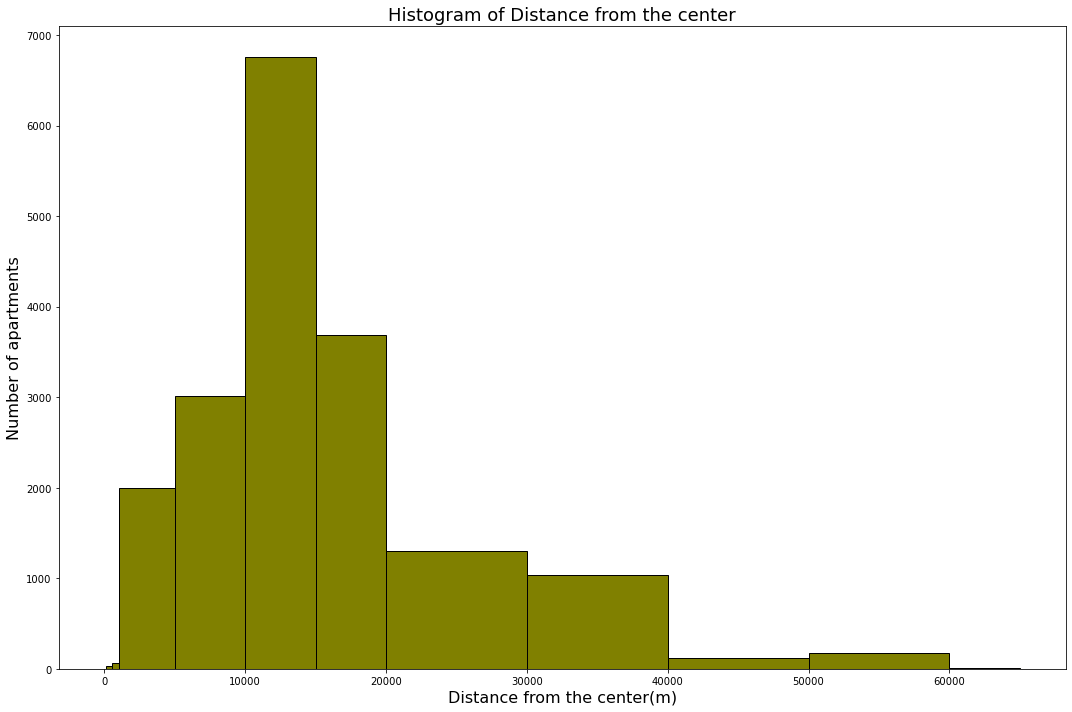

In [385]:
plt.figure(figsize = (15, 10))
plt.hist(data['city_center_near'], bins = [0, 100, 500, 1000, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 60000, 65000],       
                               color = 'Olive', edgecolor = 'black')
plt.xlabel('Distance from the center(m)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Distance from the center', size=18)
plt.tight_layout()
plt.show()

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
По графику видно, что больше всего квартир(помещений) продаётся удалённостью от центра в промежутке от 10000 м до 15000 м (от 10 км до 15 км) - это около 30% от всех квартир

In [386]:
data[data['city_center_near'] == 65968.0] #проверила адекватность самого удаленного объекта

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,city_center_near,days_exposition
9640,4200000.0,51.4,2014-12-10T00:00:00,2,2.55,5,31.0,2,False,False,False,6.0,1,посёлок Молодёжное,65968.0,1194.0


## Заменяем пропуски колонки удалённости от центра города

In [387]:
data[data['city_center_near'].isnull()].shape

(5519, 16)

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Так как ошибок много, думаю, есть смысл заменить удалённость от центра средней удаленностью по городу (посёлку), в котором находится квартира 

In [388]:
data.loc[(data['city_center_near'].isnull()) & (data['locality_name'] == 'Санкт-Петербург')].shape

(69, 16)

In [389]:
data_for_city_center = data.loc[(data['locality_name'] == 'Санкт-Петербург')]

In [390]:
data_for_city_center['city_center_near'].mean() 

11592.308663224327

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
12000.0 м  - это средняя удаленность от центра по г.Санкт-Петербург, этим значением заменяем те пропуски колонки удалённости, которые принадлежат этой локации

In [391]:
data.loc[(data['city_center_near'].isnull()) & 
         (data['locality_name'] == 'Санкт-Петербург'), 
         'city_center_near'] = 12000.0

data_for_city_center = data[data['city_center_near'].isnull()]

In [392]:
data_for_city_center['locality_name'].value_counts() 

посёлок Мурино                     522
Всеволожск                         398
Гатчина                            307
деревня Кудрово                    299
Выборг                             237
                                  ... 
деревня Пельгора                     1
поселок Каложицы                     1
посёлок Платформа 69-й километр      1
поселок Почап                        1
посёлок Дзержинского                 1
Name: locality_name, Length: 344, dtype: int64

In [393]:
data_for_city_center = data.loc[(data['locality_name'] == 'посёлок Мурино')]

In [394]:
data_for_city_center['city_center_near'].mean()

# также нахожу среднее для Мурино

nan

In [395]:
# ну или не нахожу

In [396]:
data_for_city_center = data.loc[(data['locality_name'] == 'Всеволожск')]

In [397]:
data_for_city_center['city_center_near'].mean()

41294.0

In [398]:
data.loc[(data['city_center_near'].isnull()) & 
         (data['locality_name'] == 'Всеволожск'), 
         'city_center_near'] = 41294.0

data_for_city_center = data.loc[(data['locality_name'] == 'Гатчина')] 

In [400]:
data_for_city_center['city_center_near'].mean() 

nan

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Так как не получилось таким образом найти среднюю удалённость локаций, я равномерно распределю колонки с пропусками
по удалённости локаций, среднее значение которых удасться найти, чтобы не было большого скачка

<AxesSubplot:>

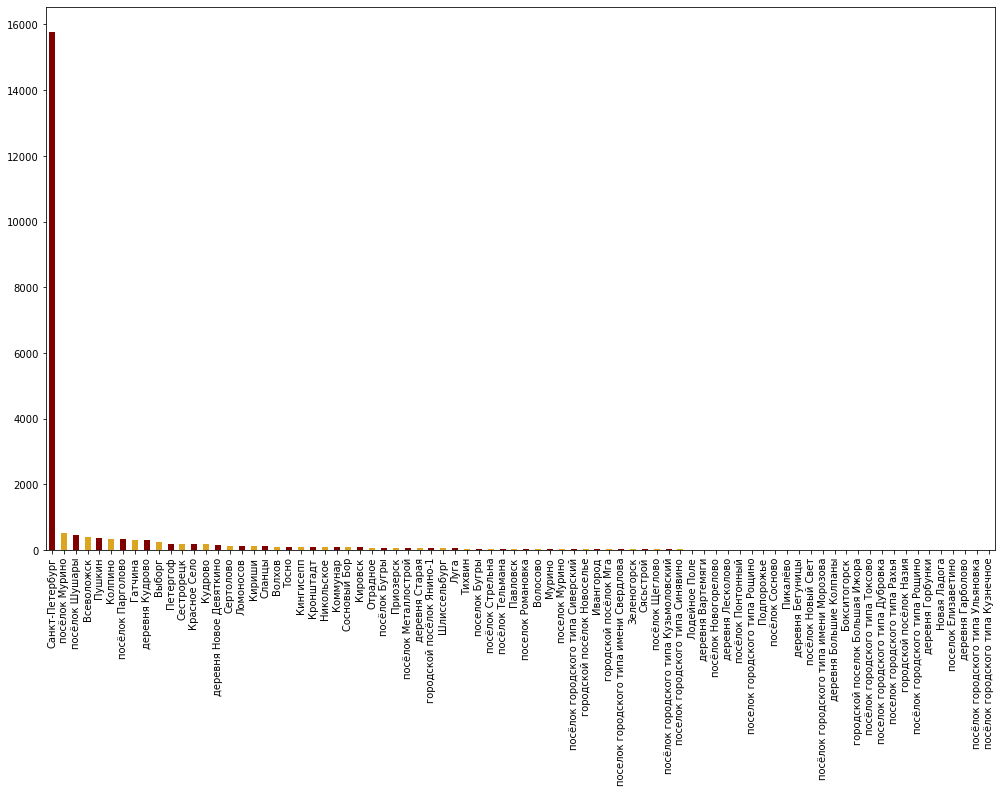

In [118]:
cities = data['locality_name'].value_counts().head(80)
color_bar = 'Maroon', 'Goldenrod'

cities.plot.bar(figsize=(17, 10), color=color_bar)

# построим еще раз график с локациями

In [119]:
data_for_city_center = data.loc[(data['locality_name'] == 'посёлок Шушары')]

In [120]:
data_for_city_center['city_center_near'].mean()

24153.10514541387

In [121]:
data[data['city_center_near'].isnull()].shape

# 20 процентов ошибок от общего

(5052, 16)

In [122]:
data.loc[(data['city_center_near'].isnull()) & (data['total_area'] <= 35.0), 'city_center_near'] = 24153

In [123]:
data[data['city_center_near'].isnull()].shape

(4012, 16)

In [124]:
data_for_city_center = data.loc[(data['locality_name'] == 'Петергоф')]

In [125]:
data_for_city_center['city_center_near'].mean()

35468.92537313433

In [126]:
data.loc[(data['city_center_near'].isnull()) & (data['total_area'] > 35.0) & (data['total_area'] < 45.0), 'city_center_near'] = 35469.0

In [127]:
data_for_city_center = data.loc[(data['locality_name'] == 'Колпино')]

In [128]:
data_for_city_center['city_center_near'].mean()

32123.698224852073

In [129]:
data.loc[(data['city_center_near'].isnull()) & (data['total_area'] > 45.0) & (data['total_area'] < 65.0), 'city_center_near'] = 32123.0

In [130]:
data[data['city_center_near'].isnull()].shape

(911, 16)

In [131]:
data.loc[(data['city_center_near'].isnull()), 'city_center_near'] = 27500.0

# заменяю этим значением, чтобы сравнять cкачок между отдаленностью от 20 км до 30 км

In [132]:
data['city_center_near'] = data['city_center_near'].round(1)

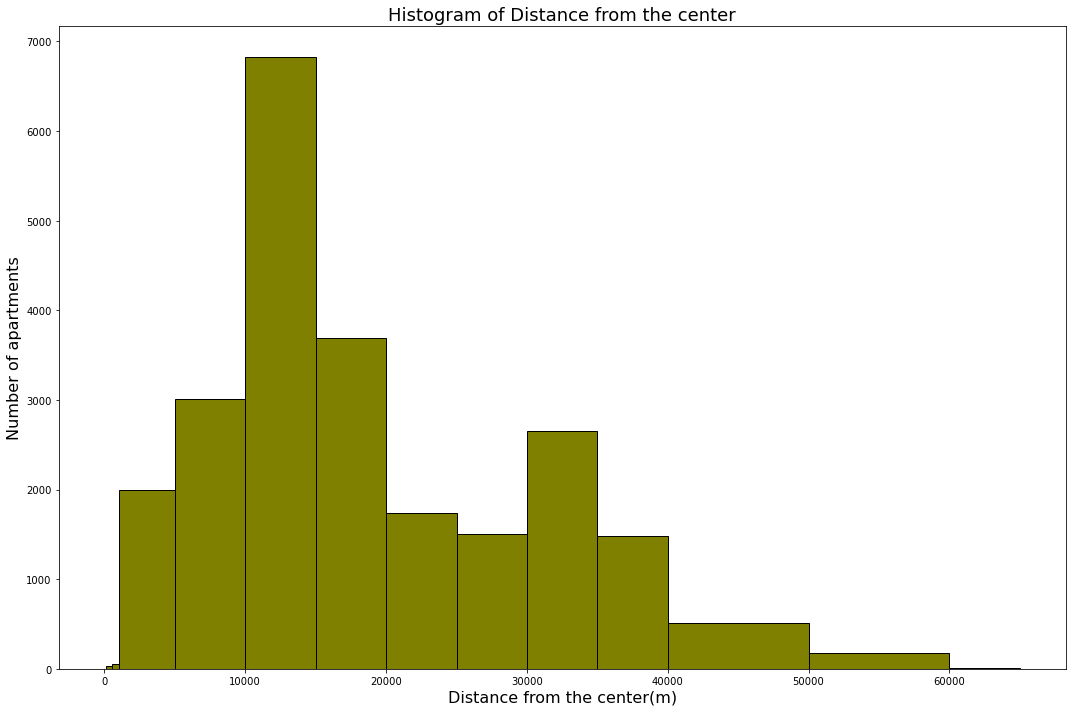

In [133]:
plt.figure(figsize = (15, 10))
plt.hist(data['city_center_near'], 
         bins = [0, 100, 500, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 60000, 65000],       
         color = 'Olive', 
         edgecolor = 'black')
plt.xlabel('Distance from the center(m)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Distance from the center', size=18)
plt.tight_layout()
plt.show()

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23697 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23697 non-null  float64
 1   total_area            23697 non-null  float64
 2   first_day_exposition  23697 non-null  object 
 3   rooms                 23697 non-null  int64  
 4   ceiling_height        23697 non-null  float64
 5   floors_total          23697 non-null  int64  
 6   living_area           23697 non-null  float64
 7   floor                 23697 non-null  int64  
 8   is_apartment          23697 non-null  bool   
 9   studio                23697 non-null  bool   
 10  open_plan             23697 non-null  bool   
 11  kitchen_area          23697 non-null  float64
 12  balcony               23697 non-null  int64  
 13  locality_name         23697 non-null  object 
 14  city_center_near      23697 non-null  float64
 15  days_exposition    

In [135]:
del data_for_city_center

# "days_exposition"

In [136]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [137]:
data[data['days_exposition'].isnull()].shape

# 13% ошибок
# заполним пропуски средним значением по количеству дней объявления

(3181, 16)

In [138]:
data['days_exposition'] =  data['days_exposition'].fillna(data['days_exposition'].mean())

In [139]:
data['days_exposition'] = data['days_exposition'].astype(int)

In [140]:
data.info() #предобработка выполнена

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23697 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23697 non-null  float64
 1   total_area            23697 non-null  float64
 2   first_day_exposition  23697 non-null  object 
 3   rooms                 23697 non-null  int64  
 4   ceiling_height        23697 non-null  float64
 5   floors_total          23697 non-null  int64  
 6   living_area           23697 non-null  float64
 7   floor                 23697 non-null  int64  
 8   is_apartment          23697 non-null  bool   
 9   studio                23697 non-null  bool   
 10  open_plan             23697 non-null  bool   
 11  kitchen_area          23697 non-null  float64
 12  balcony               23697 non-null  int64  
 13  locality_name         23697 non-null  object 
 14  city_center_near      23697 non-null  float64
 15  days_exposition    

## Работа с DateTime

In [141]:
data['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23697, dtype: object

Это стандартная маска для времени

yyyy-mm-ddZhh-mm-ss

In [142]:
data['datetime'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [143]:
data['datetime'].dt.year

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: datetime, Length: 23697, dtype: int64

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23697 entries, 0 to 23698
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23697 non-null  float64       
 1   total_area            23697 non-null  float64       
 2   first_day_exposition  23697 non-null  object        
 3   rooms                 23697 non-null  int64         
 4   ceiling_height        23697 non-null  float64       
 5   floors_total          23697 non-null  int64         
 6   living_area           23697 non-null  float64       
 7   floor                 23697 non-null  int64         
 8   is_apartment          23697 non-null  bool          
 9   studio                23697 non-null  bool          
 10  open_plan             23697 non-null  bool          
 11  kitchen_area          23697 non-null  float64       
 12  balcony               23697 non-null  int64         
 13  locality_name   

In [145]:
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,city_center_near,days_exposition,datetime
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,16028.0,180,2019-03-07
1,3350000.0,40.4,2018-12-04T00:00:00,1,2.73,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,18603.0,81,2018-12-04
2,5196000.0,56.0,2015-08-20T00:00:00,2,2.73,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,13933.0,558,2015-08-20
3,64900000.0,159.0,2015-07-24T00:00:00,3,2.73,14,34.5,9,False,False,False,29.5,0,Санкт-Петербург,6800.0,424,2015-07-24
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,8098.0,121,2018-06-19


# Исследовательский анализ

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
 Высчитаем цену квадратного метра. Это можно сделать делением цены на квартиру (помещение) на ее (его) общую площадь 

In [146]:
data['price_for_m2'] = data['last_price'] / data['total_area'] #добавим в наш датасет

In [147]:
data['price_for_m2'] = data['price_for_m2'].round(2)

In [148]:
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,city_center_near,days_exposition,datetime,price_for_m2
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,16028.0,180,2019-03-07,120370.37
1,3350000.0,40.4,2018-12-04T00:00:00,1,2.73,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,18603.0,81,2018-12-04,82920.79
2,5196000.0,56.0,2015-08-20T00:00:00,2,2.73,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,13933.0,558,2015-08-20,92785.71
3,64900000.0,159.0,2015-07-24T00:00:00,3,2.73,14,34.5,9,False,False,False,29.5,0,Санкт-Петербург,6800.0,424,2015-07-24,408176.10
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,8098.0,121,2018-06-19,100000.00


<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Вынесем день недели, месяц, год в отдельные столбцы датафрейма

In [153]:
data['year_of_exp'] = data['datetime'].dt.year

data['month_of_exp'] = data['datetime'].dt.month

data['day_of_exp'] = data['datetime'].dt.day

data = data.drop(columns=['first_day_exposition'], axis=1)

data.head()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,city_center_near,days_exposition,datetime,price_for_m2,year_of_exp,month_of_exp,day_of_exp
0,13000000.0,108.0,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,16028.0,180,2019-03-07,120370.37,2019,3,7
1,3350000.0,40.4,1,2.73,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,18603.0,81,2018-12-04,82920.79,2018,12,4
2,5196000.0,56.0,2,2.73,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,13933.0,558,2015-08-20,92785.71,2015,8,20
3,64900000.0,159.0,3,2.73,14,34.5,9,False,False,False,29.5,0,Санкт-Петербург,6800.0,424,2015-07-24,408176.10,2015,7,24
4,10000000.0,100.0,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,8098.0,121,2018-06-19,100000.00,2018,6,19


## Найдем соотношение жилой площади к общей площади

In [155]:
data['living_ar_to_total_ar(%)'] = data['living_area'] / data['total_area']

data['living_ar_to_total_ar(%)'] = data['living_ar_to_total_ar(%)'].round(2)

In [156]:
data.head()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,balcony,locality_name,city_center_near,days_exposition,datetime,price_for_m2,year_of_exp,month_of_exp,day_of_exp,living_ar_to_total_ar(%)
0,13000000.0,108.0,3,2.70,16,51.0,8,False,False,False,...,0,Санкт-Петербург,16028.0,180,2019-03-07,120370.37,2019,3,7,0.47
1,3350000.0,40.4,1,2.73,11,18.6,1,False,False,False,...,2,посёлок Шушары,18603.0,81,2018-12-04,82920.79,2018,12,4,0.46
2,5196000.0,56.0,2,2.73,5,34.3,4,False,False,False,...,0,Санкт-Петербург,13933.0,558,2015-08-20,92785.71,2015,8,20,0.61
3,64900000.0,159.0,3,2.73,14,34.5,9,False,False,False,...,0,Санкт-Петербург,6800.0,424,2015-07-24,408176.10,2015,7,24,0.22
4,10000000.0,100.0,2,3.03,14,32.0,13,False,False,False,...,0,Санкт-Петербург,8098.0,121,2018-06-19,100000.00,2018,6,19,0.32


<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Найдем соотношение кухонной зоны к общей площади квартиры (помещения)

In [158]:
data['kitchen_ar_to_total_ar(%)'] = data['kitchen_area'] / data['total_area'] 

data['kitchen_ar_to_total_ar(%)'] = data['kitchen_ar_to_total_ar(%)'].round(2)

In [159]:
data.head()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,locality_name,city_center_near,days_exposition,datetime,price_for_m2,year_of_exp,month_of_exp,day_of_exp,living_ar_to_total_ar(%),kitchen_ar_to_total_ar(%)
0,13000000.0,108.0,3,2.70,16,51.0,8,False,False,False,...,Санкт-Петербург,16028.0,180,2019-03-07,120370.37,2019,3,7,0.47,0.23
1,3350000.0,40.4,1,2.73,11,18.6,1,False,False,False,...,посёлок Шушары,18603.0,81,2018-12-04,82920.79,2018,12,4,0.46,0.27
2,5196000.0,56.0,2,2.73,5,34.3,4,False,False,False,...,Санкт-Петербург,13933.0,558,2015-08-20,92785.71,2015,8,20,0.61,0.15
3,64900000.0,159.0,3,2.73,14,34.5,9,False,False,False,...,Санкт-Петербург,6800.0,424,2015-07-24,408176.10,2015,7,24,0.22,0.19
4,10000000.0,100.0,2,3.03,14,32.0,13,False,False,False,...,Санкт-Петербург,8098.0,121,2018-06-19,100000.00,2018,6,19,0.32,0.41


<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Изучаем высоту потолков, цену, число комнат и площадь

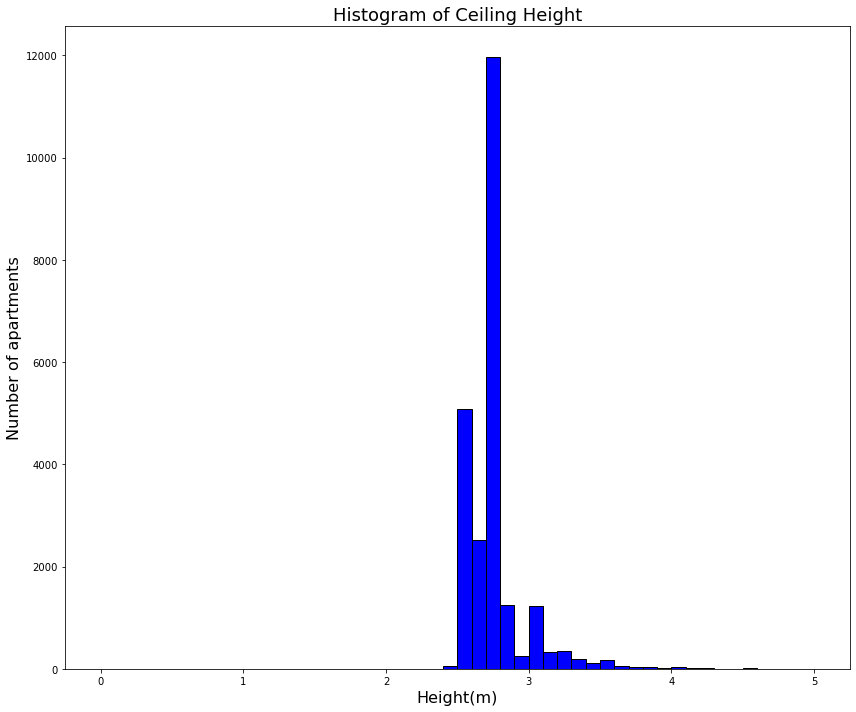

In [160]:
plt.figure(figsize = (12, 10))
plt.hist(data['ceiling_height'], bins = [0, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 
                                         2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3,
                                         3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 
                                         4.1, 4.2, 4.3 ,4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5],
                                 color = 'blue', edgecolor = 'black')
plt.xlabel('Height(m)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Ceiling Height', size=18)
plt.tight_layout()
plt.show()

In [161]:
data_for_hist = data[data['last_price'] <= 100000000]

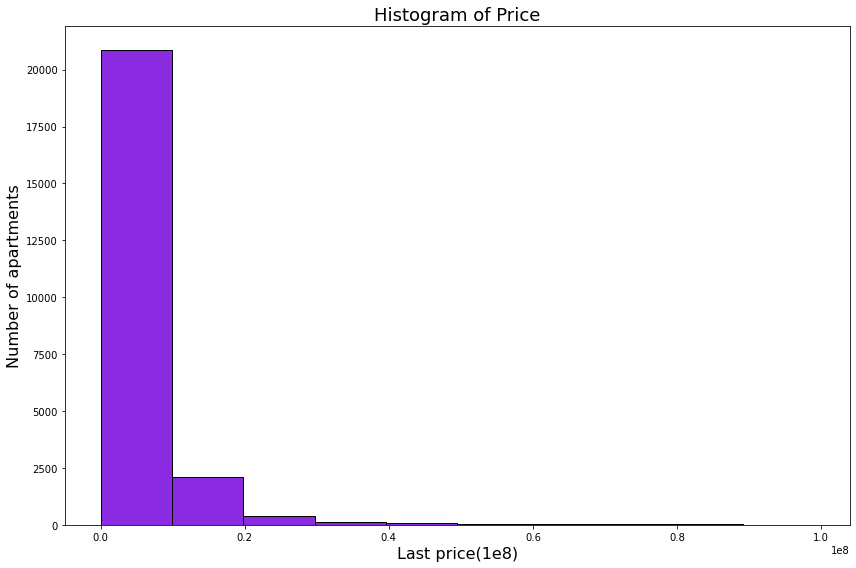

In [162]:
plt.figure(figsize = (12, 8))
plt.hist(data_for_hist['last_price'], 
         bins = 10,
         color='BlueViolet', 
         edgecolor = 'black')
plt.xlabel('Last price(1e8)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Price', size=18)
plt.tight_layout()
plt.show()

In [163]:
data_for_hist2 = data[data['last_price'] > 100000000]

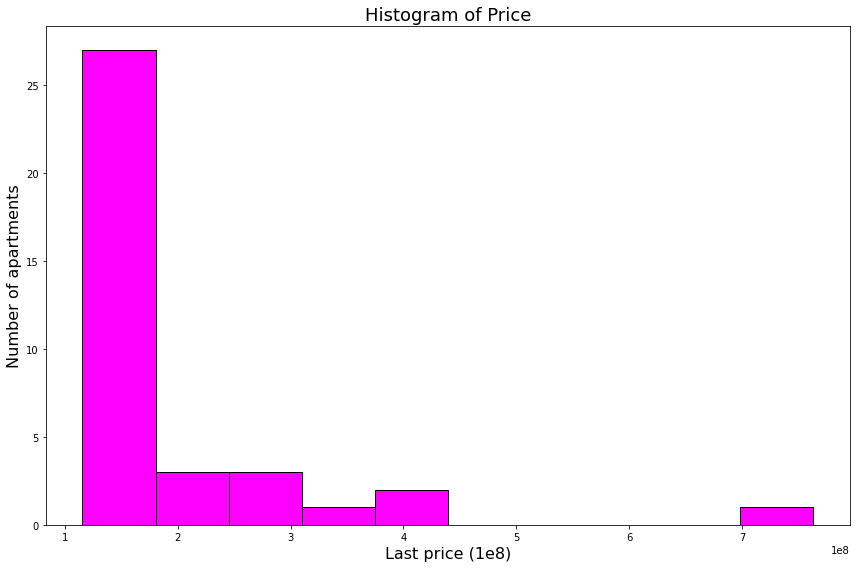

In [164]:
plt.figure(figsize = (12, 8))
plt.hist(data_for_hist2['last_price'], bins = 10, color='Fuchsia' , edgecolor = 'black')
plt.xlabel('Last price (1e8)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Price', size=18)
plt.tight_layout()
plt.show()

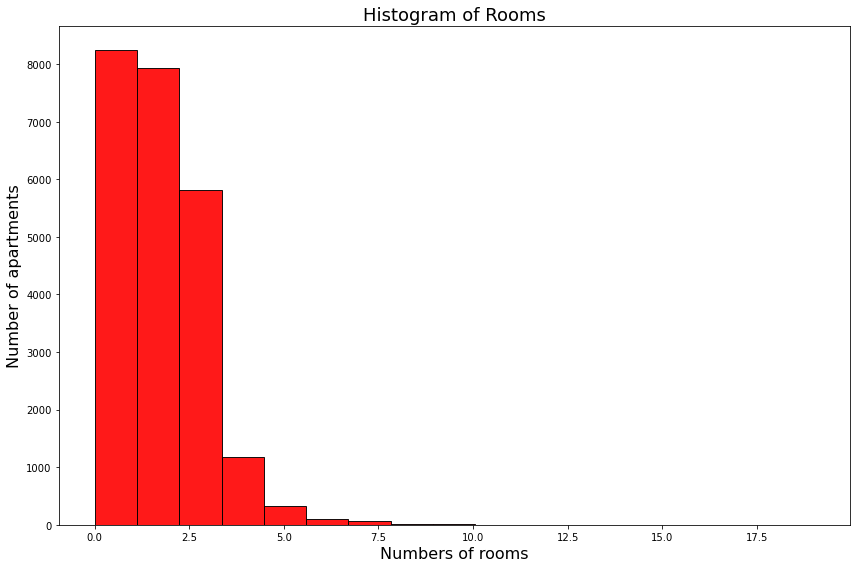

In [165]:
plt.figure(figsize = (12, 8))
plt.hist(data['rooms'], bins = 17, color='red' , edgecolor = 'black', alpha=0.9)
plt.xlabel('Numbers of rooms', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Rooms', size=18)
plt.tight_layout()
plt.show()

In [166]:
data_total_area_hist = data[data['total_area'] <= 200.0]

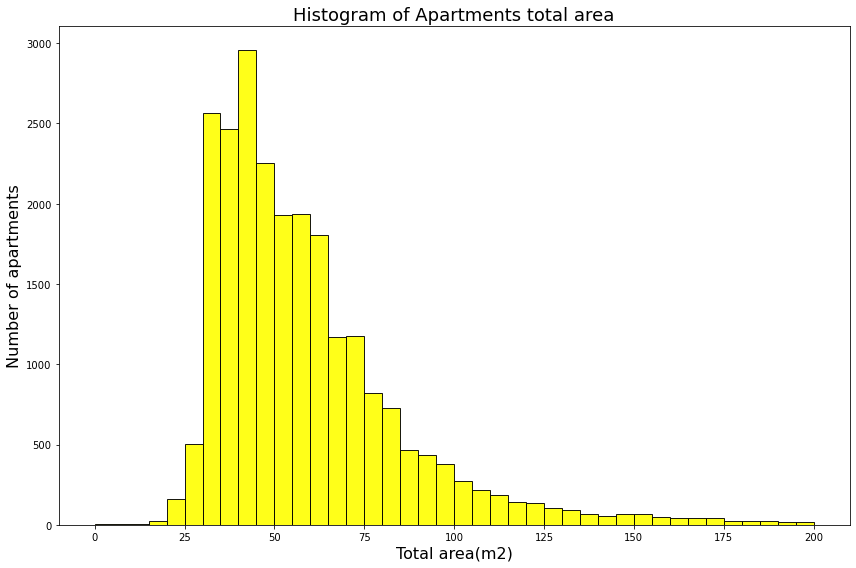

In [167]:
plt.figure(figsize = (12, 8))
plt.hist(data_total_area_hist['total_area'], bins = [0, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
                                                 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145,
                                                 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
                                             color='yellow' , edgecolor = 'black', alpha=0.9)
plt.xlabel('Total area(m2)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Apartments total area', size=18)
plt.tight_layout()
plt.show()

In [168]:
data_total_area_hist2 = data[data['total_area'] > 200.0]

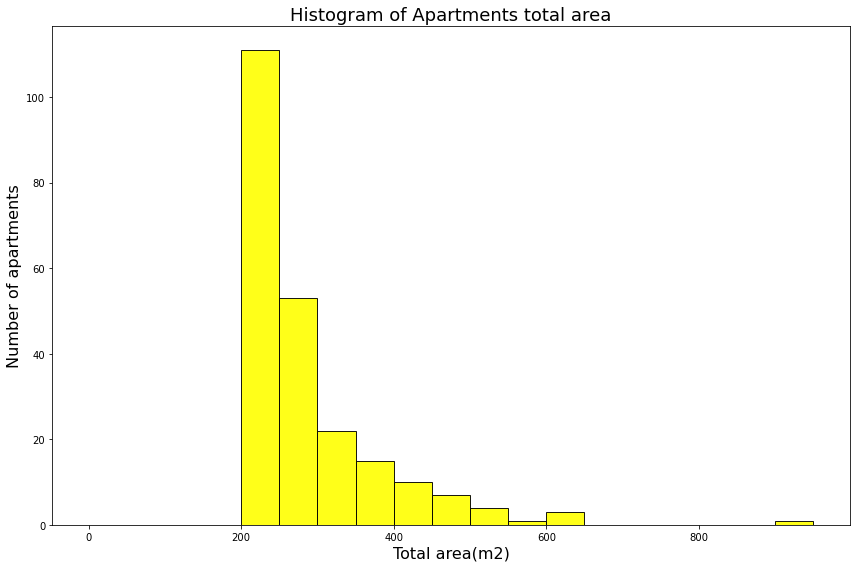

In [169]:
plt.figure(figsize = (12, 8))
plt.hist(data_total_area_hist2['total_area'], bins = [0, 200, 250, 300, 350, 400, 450, 500, 550, 
                                                      600, 650, 700, 750, 800, 850, 900, 950],
                                              color='Yellow' , edgecolor = 'black', alpha=0.9)
plt.xlabel('Total area(m2)', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Apartments total area', size=18)
plt.tight_layout()
plt.show()

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Проведем анализ продажи квартиры. Будем ориентироваться на то, сколько всего времени провисело объявление.

In [170]:
data['days_exposition'].value_counts()

180     3224
45       880
60       538
7        234
30       208
        ... 
1021       1
1362       1
1105       1
795        1
971        1
Name: days_exposition, Length: 1141, dtype: int64

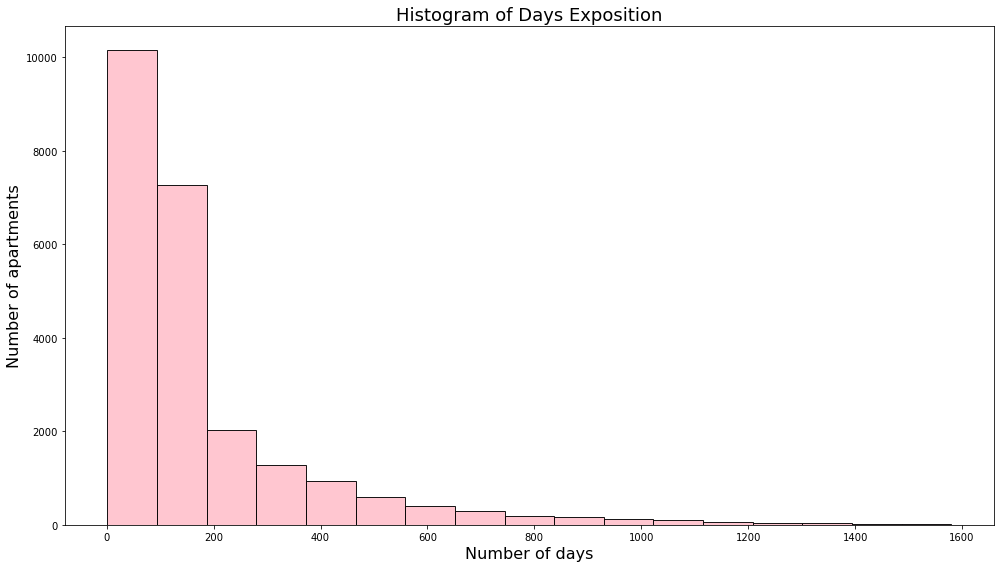

In [171]:
plt.figure(figsize = (14, 8))
plt.hist(data['days_exposition'], bins = 17, color='pink' , edgecolor = 'black', alpha=0.9)
plt.xlabel('Number of days', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Days Exposition', size=18)
plt.tight_layout()
plt.show()

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
По гистограмме видно, что больше всего квартир продается в промежутке от 50 до 150 дней. Можно считать, что продажа прошла быстро, если на это ушло до 200 дней(полгода), очень долго - от 400 дней (года и месяца)

In [172]:
data[data['days_exposition'] < 50].shape

(6287, 22)

In [173]:
data['days_exposition'].mean() / 30 

# полгода в среднем уходит на продажу квартиры

6.026108790142213

In [174]:
data['days_exposition'].median()

124.0

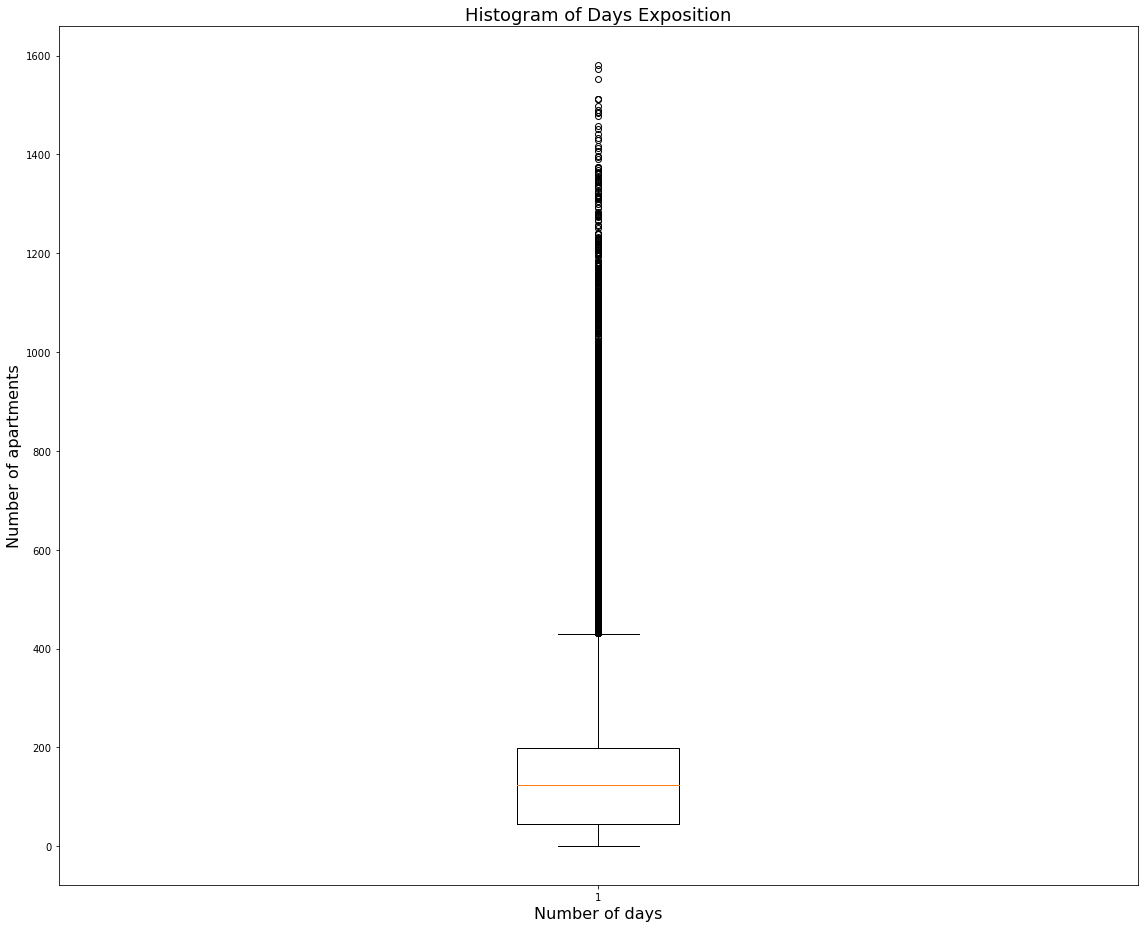

In [175]:
plt.figure(figsize = (16, 13))
plt.boxplot(data['days_exposition'])
plt.xlabel('Number of days', size=16)
plt.ylabel('Number of apartments', size=16)
plt.title('Histogram of Days Exposition', size=18)
plt.tight_layout()
plt.show()

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
По боксплоту можно увидеть выбивающиеся значения, которые идут после 420 дней (больше 1 года) публикации объявления о продаже. Самыми редкими значениями являются значения от 3.5 лет публикации. 

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Выбрать 10 населенных пунктов с большим числом объявлений и посчитать среднюю цену для них.

In [176]:
(data
 .pivot_table(index=['locality_name'], 
              values=['last_price'], 
              aggfunc=['count', 'mean'])
 .sort_values([('count', 'last_price')], 
              ascending=False)
 .head(10))

,count,mean
,last_price,last_price
locality_name,,
Санкт-Петербург,15756,8.060292e+06
посёлок Мурино,522,3.672049e+06
посёлок Шушары,451,4.107891e+06
Всеволожск,399,3.822484e+06
Пушкин,369,6.469036e+06
Колпино,338,3.964021e+06
посёлок Парголово,327,4.488075e+06
Гатчина,307,3.488337e+06


<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Проанализировать факторы, которые сильнее всего влияют на стоимость квартиры.

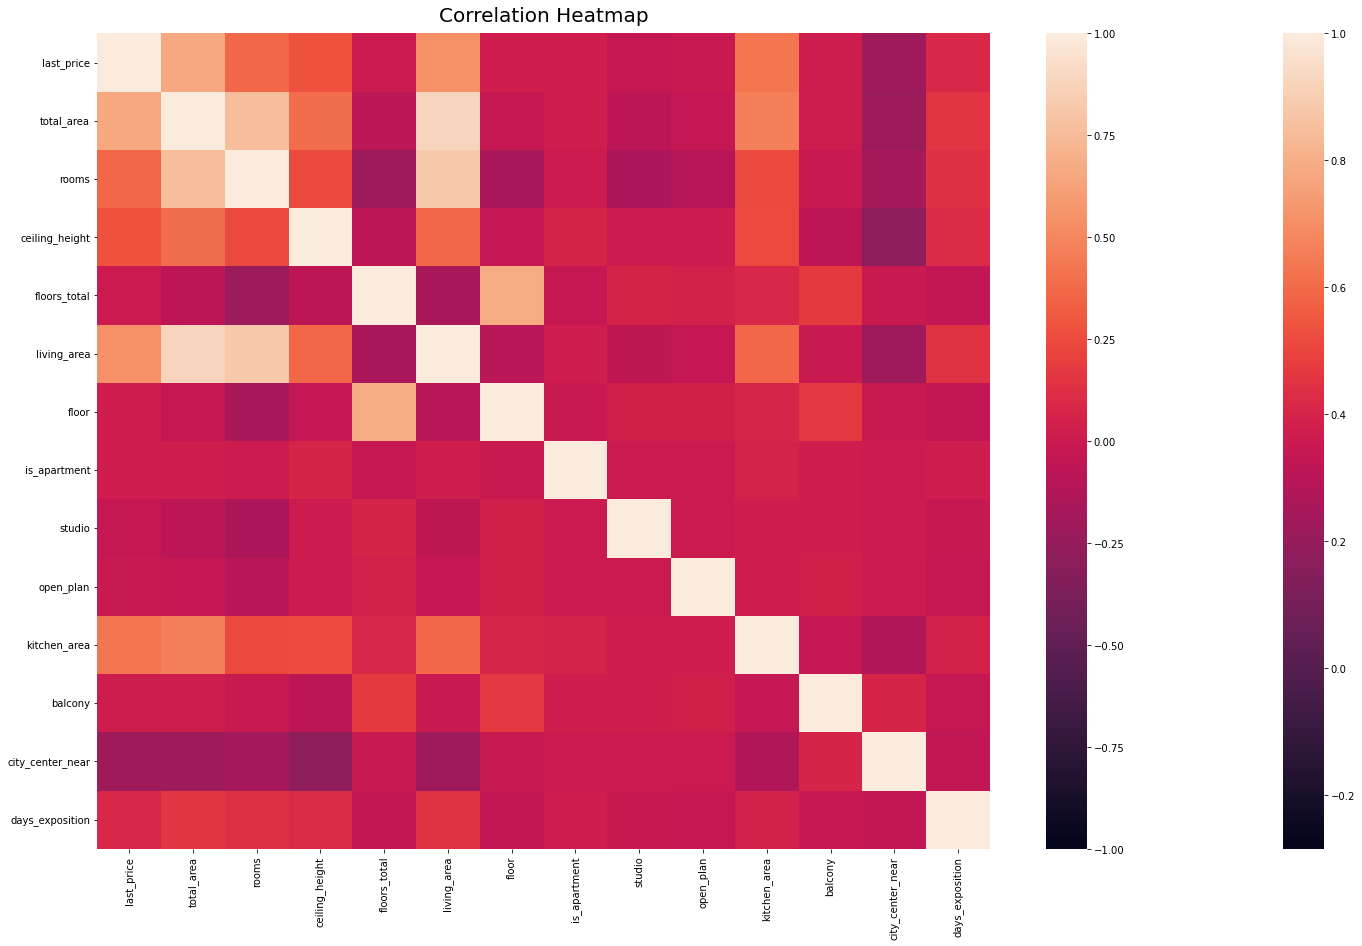

In [403]:
plt.figure(figsize=(25, 15))
sns.heatmap(data.corr())
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True) 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Судя по тепловой карте можно сказать, что главные факторы, влияющие на цену это: общая и жилая площади, количество комнат, площадь кухни и высота потолков

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

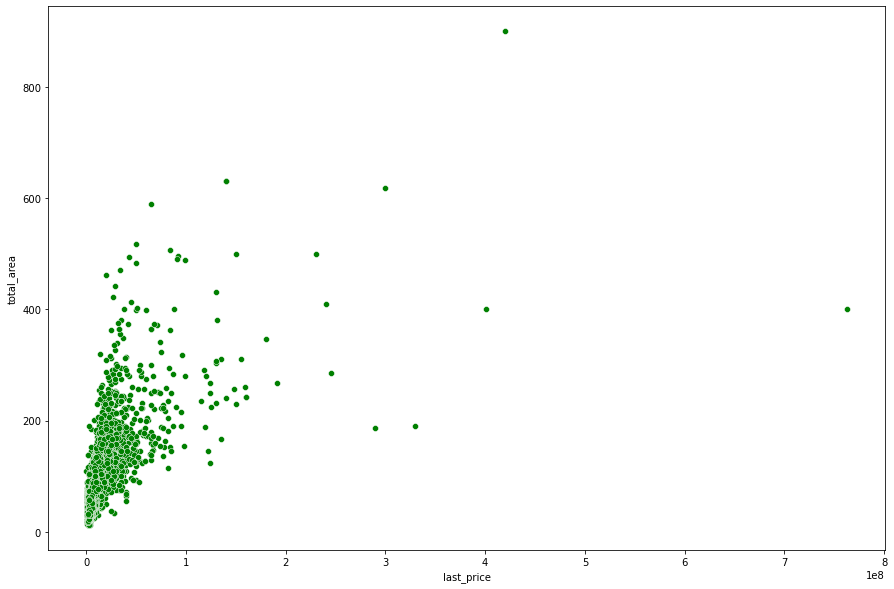

In [179]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x="last_price", y="total_area", color='green')

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

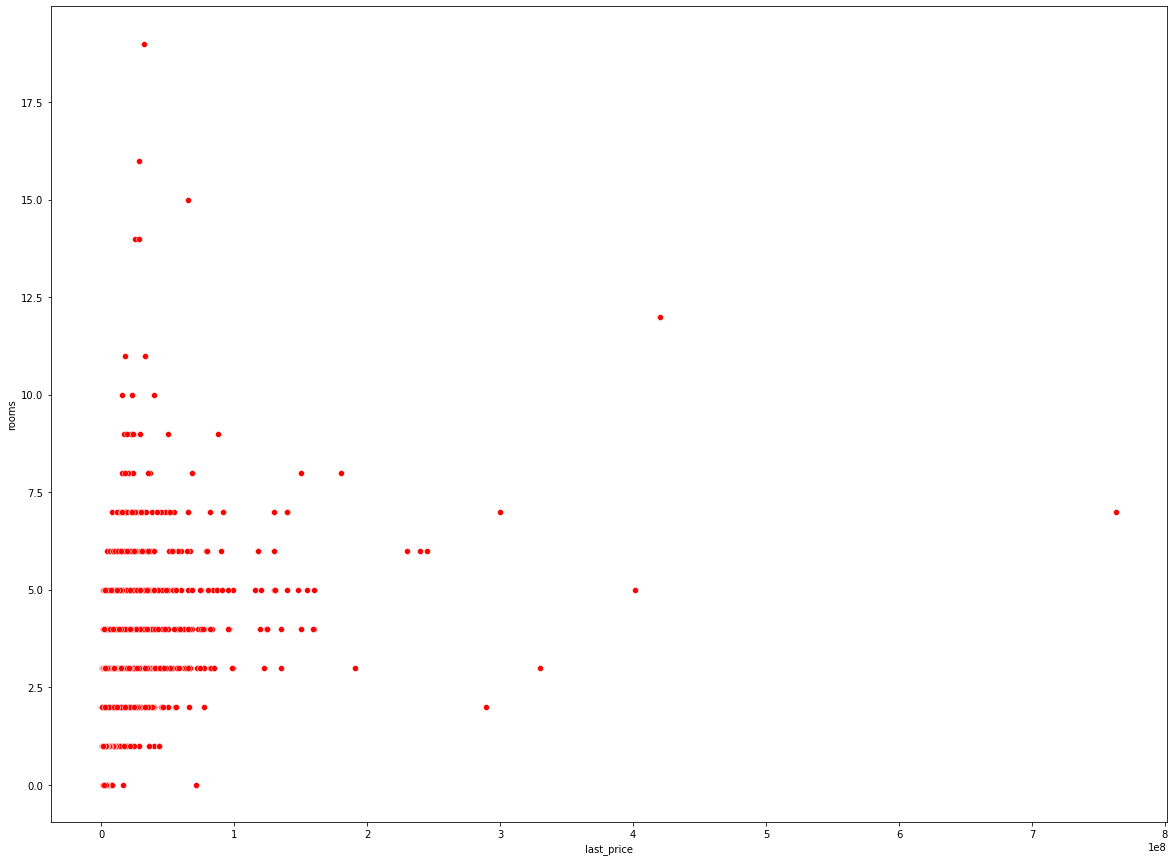

In [180]:
plt.figure(figsize=(20, 15))
sns.scatterplot(data=data, x="last_price", y="rooms", color='red')

<AxesSubplot:xlabel='last_price', ylabel='city_center_near'>

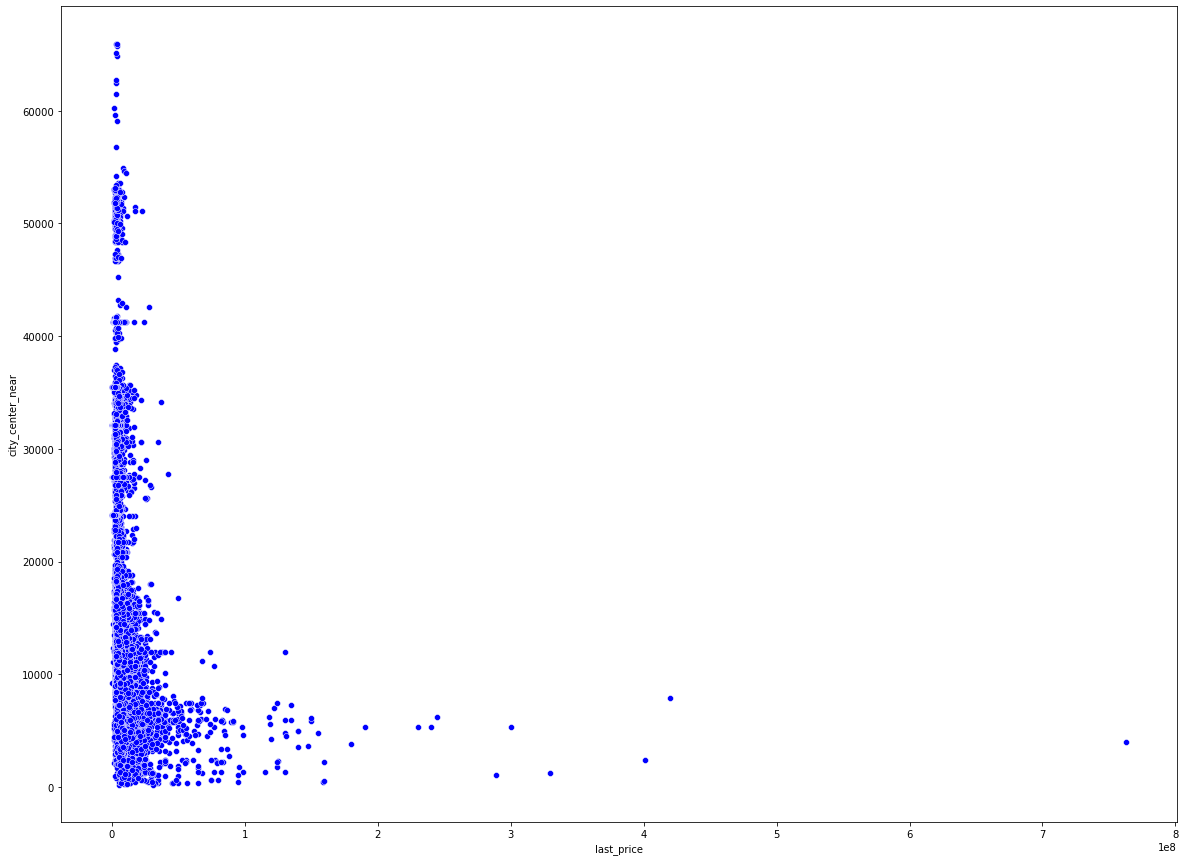

In [181]:
plt.figure(figsize=(20, 15))
sns.scatterplot(data=data, x="last_price", y="city_center_near", color='blue')

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Проведём анализ области, входящей в центр города Санкт-Петербург. Найдем центральную зону

In [184]:
data['city_center_near(km)'] = data['city_center_near'] / 1000 # создаем новый столбец удаленности в км

data['city_center_near(km)'] = data['city_center_near(km)'].astype(int) 

data_to_city_center = data[data['locality_name'] == 'Санкт-Петербург']

# создаем датафрейм исключительно с Санкт-Петербургом

In [185]:
data_to_city_center.shape

(15756, 23)

In [186]:
(data_to_city_center
 .pivot_table(index=['city_center_near(km)'], 
              values=['last_price'], 
              aggfunc=['count','mean'])
 .sort_values([('count', 'last_price')], 
              ascending=False)
 .head(20))

,count,mean
,last_price,last_price
city_center_near(km),,
12,1586,6.338191e+06
14,1511,5.769316e+06
11,1415,5.977039e+06
13,1402,6.022927e+06
15,1373,5.545776e+06
16,1107,5.526276e+06
4,916,1.357942e+07
10,913,6.378308e+06


In [187]:
data_to_city_center['city_center_near(km)'].max()

29

<AxesSubplot:xlabel='city_center_near(km)', ylabel='last_price'>

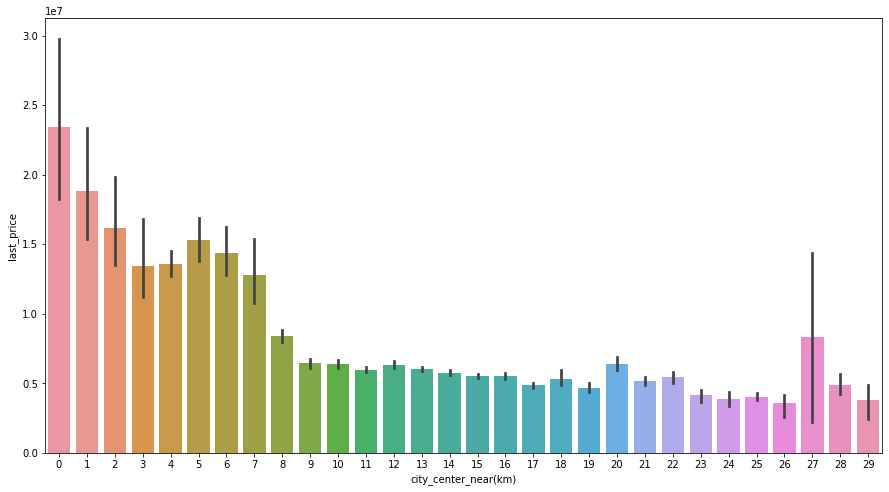

In [188]:
x = data_to_city_center['city_center_near(km)']
y = data_to_city_center['last_price']

plt.figure(figsize=(15,8))
sns.barplot(x=x, y=y)

<div style="background-color: #EEE7E7; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
График значительно меняется в промежутке отдаленности от 7 до 9 км от центра, можно предположить, что это центральная зона